# Introduction to Pandas

In this tutorial, we will learn how to use Pandas by analyzing a real-world dataset.

The dataset that we are going to analyze is the TED talk dataset which is available on Kaggle (https://www.kaggle.com/datasets/ahmadfatani/ted-talks-dataset). The dataset contains information about all video recordings of TED Talks uploaded to the official TED.com website until April 18th, 2020. It contains information about all talks including the number of views, tags, posted-date, speakers and titles.

Note that you do not have to download the dataset from Kaggle since the data is already contained in the Github repository.

In [1]:
import pandas as pd

ted_df = pd.read_csv('../ted_talk_dataset/ted_main.csv')

## Plot the number of talks that took place each year

**Important remark**: The column "film_date" provides informatipn when the TED talk took place (when it was filmed). <br/>
The value used to represent the data is a **unix epoch timestamp**.

### Converting the "film_date column into a more usable format

In [2]:
print(ted_df.film_date.sample(10))

698     1265846400
934     1299024000
759     1279152000
1499    1367884800
1461    1334188800
1876    1410825600
2470    1492992000
446     1233792000
12      1140652800
1579    1370995200
Name: film_date, dtype: int64


According to the dataset's documentation, this timestamp a unix epoch timestamp. This means that the value represents the number of seconds that have elapsed since January 1st, 1970 UTC.

Since we are only interested in the year of filming, the unix timestamp is difficult to work with. So let's see whether we can convert this timestamp into a format that is more useful.

So, first, let's check which data types are available in Pandas and whether there is any type that supports dates.

Documentation: https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes

The answer is yes. If we browse through the documentation, we can indeed find a function pd.to_datetime() that seems to be able to convert different formats to datetime objects.

See: https://pandas.pydata.org/docs/user_guide/timeseries.html#converting-to-timestamps

In [3]:
# Important: Do not forget to specify the unit. 
# Other Pandas will assume an input other than a unix epoch timestamp format.
# Note that setting unit="s", we tell pandas that the passed values is provided in seconds (not nanoseconds [default])
pd.to_datetime(ted_df.film_date, unit='s')

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_date, Length: 2550, dtype: datetime64[ns]

Ok, that looks pretty nice. So let's update the column in our original dataframe.

In [4]:
ted_df['film_date'] = pd.to_datetime(ted_df.film_date, unit='s')

In [5]:
# Briefly check whether the data type has changed ==> Yes
print(ted_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2550 non-null   int64         
 1   description         2550 non-null   object        
 2   duration            2550 non-null   int64         
 3   event               2550 non-null   object        
 4   film_date           2550 non-null   datetime64[ns]
 5   languages           2550 non-null   int64         
 6   main_speaker        2550 non-null   object        
 7   name                2550 non-null   object        
 8   num_speaker         2550 non-null   int64         
 9   published_date      2550 non-null   int64         
 10  ratings             2550 non-null   object        
 11  related_talks       2550 non-null   object        
 12  speaker_occupation  2544 non-null   object        
 13  tags                2550 non-null   object      

In [6]:
ted_df.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110


### Count the number of values in each year

We are interested in the number of talks that took place each year. Consequently, this requires us to obtain the "year" from `film_date`. So, let's see what functions are available to "read" the year from `datetime64[ns]`.

As can be seen in the documentation, Pandas' Series provides a large variety of methods to process dates. For example, the year of a datetime object can be accessed via the `.dt.year` attribute.

In [7]:
ted_df.film_date.dt.year

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
2545    2017
2546    2017
2547    2017
2548    2017
2549    2017
Name: film_date, Length: 2550, dtype: int32

Nice, this is exactly what we are looking for.

In [8]:
ted_df.film_date.dt.year.value_counts()

film_date
2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2004     33
2003     33
2002     27
1998      6
2001      5
1983      1
1972      1
1990      1
1994      1
1984      1
1991      1
Name: count, dtype: int64

### Prepare the plot

Note that the labels appear in random order. In order to properly visualize the sequence, we need to sort the labels in ascending order.

In [9]:
ted_df.film_date.dt.year.value_counts().sort_index()

film_date
1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: count, dtype: int64

Now we can give it a try and create our first plot.

<Axes: xlabel='film_date'>

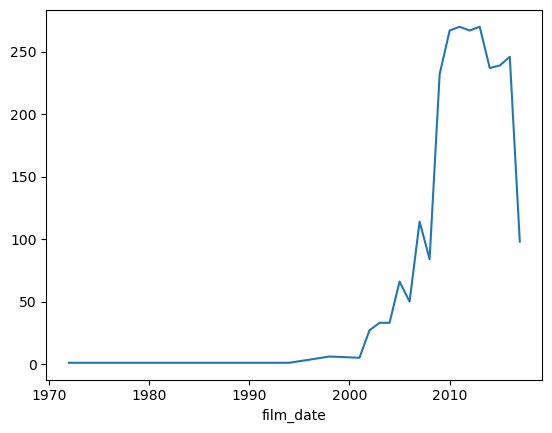

In [10]:
ted_df.film_date.dt.year.value_counts().sort_index().plot()

Ok, that looks nice so far. However, there is one strange thing. For some reason, in the last year, there is a visible drop in the number of events that took place. <br/>
The reason for this is simple. The year hasn't ended since the dataset was uploaded. So naturally, we are missing some talks.

In [11]:
# According to our dataset the last TED talk took place on 27th Oct 2017 
ted_df.film_date.max()

Timestamp('2017-08-27 00:00:00')

So, let's ignore 2017 to avoid any confusion.

<Axes: xlabel='film_date'>

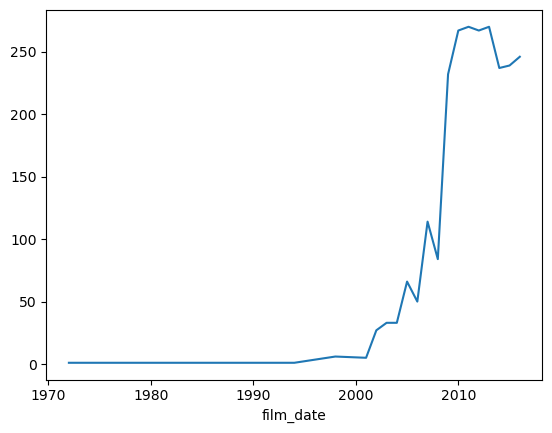

In [12]:
ted_df.film_date.dt.year.value_counts().sort_index().iloc[:-1].plot()